In [1]:

import statistics as st
%pylab
%matplotlib inline
from distutils import bcppcompiler
from sqlite3 import dbapi2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import scipy
import pandas as pd
import seaborn as sns
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import two_level_otsu as tlot
from nuclei_segmentation import local_thresholding as lt
from PIL import Image
import os
import os.path
import statistics as st
from nuclei_segmentation import complete_analysis as ca



Using matplotlib backend: <object object at 0x0000027ABEC96750>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Beste Preprocessing und Dice scores übersicht
#### global Otsu
###### NIH3T3: Stretch median -> DS: 0,700347
###### GOWT1: histogram stretching -> DS: 0,8864
###### Hela: Stretch median -> DS: 0,804843

#### two level otsu
###### NIH3T3: no preprocessing -> DS: 0,639966..
###### GOWT1: median filter -> DS:0,85367
###### Hela: histosgram stretching->DS: 0,88659


## global Otsu

### NIH3T3

In [11]:
#median
#no preprocessing
print(st.median([0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]))
#median filter
print(st.median([0.9080295797878731, 0.8787593324241103, 0.8240269286695534, 0.7274386713178076, 0.7667266042242559, 0.686254450403353, 0.6688452252743613, 0.7163285596108164, 0.03312478286129691, 0.4535714182153493, 0.0, 0.6756700217767795, 0.0, 0.5720907326399953, 0.6104348417019902, 0.047324730943574624, 0.074196645109135, 0.7870066342425532]))
#gauss filter
print(st.median([0.907993566318502, 0.8914642943015147, 0.8069728047725139, 0.7264822742303453, 0.743519705020811, 0.6420592182889145, 0.6207132472419397, 0.7030006087153718, 0.030260801481780123, 0.45019557165768614, 0.5434791870819309, 0.6601628541706102, 0.00044470409738147764, 0.5661672581481676, 0.5944399257544475, 0.04954240979132784, 0.07923756299585849, 0.7585414842260363]))
#stretch
print(st.median([0.9128436675562167, 0.8845252721173281, 0.8248360803970239, 0.758336987687637, 0.7713626482081649, 0.7238225870669582, 0.6814227277548294, 0.750270864797426, 0.15958982821109705, 0.6201720440183929, 0.6454109779570866, 0.680536637820677, 0.5594608126656365, 0.5970450004221428, 0.6165448260228947, 0.594356565444854, 0.714806990589591, 0.7925039681767514]))
################stretch median
print(st.median([0.9080295797878731, 0.9080746699707551, 0.8240269286695534, 0.7523092096313426, 0.7667266042242559, 0.7210834846002242, 0.6796112266384551, 0.7467162829788587, 0.1537407710034592, 0.61035447425189, 0.6454520836896415, 0.676574551172507, 0.5441254230662401, 0.5872934791498239, 0.6104348417019902, 0.6002316933870171, 0.737465149556319, 0.7870066342425532]))
#stretch gauss
print(st.median([0.9243979120340546, 0.9059355062148189, 0.8055670025283973, 0.7546714849415406, 0.7642509127215305, 0.7110734376824667, 0.6532941024547996, 0.7274787835458288, 0.14643436931562578, 0.5740106690586361, 0.6202289439060715, 0.6565728699391807, 0.5089780026613658, 0.5694252140882895, 0.5941469789194952, 0.577431373891274, 0.7096609579404709, 0.7487312092083761]))






0.6719810724727091
0.6722576235255704
0.6313862327654272
0.6981148591722102
0.7003473556193396
0.6831169139398259


### N2DL-HeLa

In [10]:
#median
#no preprocessing
print(st.median([0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]))
#median filter
print(st.median([0.7103253973374626, 0.6694136857682298, 0.7834791648873352, 0.7823174073771735]))
#gauss filter
print(st.median([0.7316009375318455, 0.6874533683121135, 0.7635625807166325, 0.7646670453136668]))
#stretch
print(st.median([0.809730635140136, 0.8146261556413248, 0.7972511209448173, 0.795759151830366]))
##########stretch median
print(st.median([0.8083639705882353, 0.8141226945021894, 0.8011127367379153, 0.8013222347823108]))
#stretch gauss
print(st.median([0.7901147146296559, 0.8031289427201614, 0.7853768764335839, 0.7862647140684347]))

0.7383617246919887
0.746321402357318
0.7475817591242391
0.8034908780424767
0.804843102685273
0.7881897143490453


### N2DH-GOWT1

In [9]:
#median
#no preprocessing
print(st.median([0.8554654126169282, 0.7693969459664283, 0.7856115349995373, 0.7833766399387863, 0.904528476722703, 0.884250384006287]))
#median filter
print(st.median([0.6327826522277554, 0.5614904047043956, 0.6188381296346103, 0.6492295143014204, 0.6307374670281629, 0.6537898232334218]))
#gaussian filter
print(st.median([0.6096807589823662, 0.5801316006881336, 0.6305592652896946, 0.6577469553450609, 0.6070292982057688, 0.5878604963112005]))
##################histstrecht
print(st.median([0.6573057536130297, 0.8889624027757476, 0.8888822505843782, 0.8840789866507442, 0.8466965877165696, 0.915678984885556]))
#histstretch und median
print(st.median([0.8187569108565325, 0.8003354141432963, 0.8091431569799379, 0.7855922030637635, 0.7693329038958308, 0.7614840989399293]))
#histstretch und gaussian
print(st.median([0.7835910390780781, 0.7780721879342101, 0.7858915720953467, 0.7767091122550348, 0.785076425145881, 0.7558159530301913]))

0.8205384738082327
0.6317600596279591
0.6083550285940675
0.8864806186175612
0.79296380860353
0.7808316135061442


## Two level

### NIH3T3

In [5]:

#NIH3T3 händisch berechnete Dice scores mit optimal filtersize
#mean
################no preprocessing
print(st.mean([0.9417263695042412, 0.9439370328532631, 0.5938264317277092, 0.758336987687637, 0.7993590316749856, 0.7272126154647645, 0.6814227277548294, 0.7181630754976537, 0.39260486580391374, 0.6171748562804691, 0.6454109779570866, 0.41456195234474275, 0.49592209998602965, 0.5905319096281916, 0.5107143326635717, 0.6345225131588169, 0.7434112841158013, 0.40626796678720645]))
#medianfilter
print(st.mean([0.9373094067699563, 0.9436865103037169, 0.5935842866848434, 0.7523092096313426, 0.7974643367247977, 0.7223394517512165, 0.6584341719952335, 0.6776240012382777, 0.3681077871126644, 0.6048974570895881, 0.6454520836896415, 0.4148055378061768, 0.47241217357204635, 0.5868839089031608, 0.50998098330757, 0.6248061787517993, 0.737465149556319, 0.44890112225653434]))
#gaussianfilter
print(st.mean([0.9569821829556486, 0.9328497623475924, 0.6711450326298762, 0.7474865698335778, 0.7868571458252894, 0.705490089803852, 0.6386207357876104, 0.7021194963434909, 0.31145489797952874, 0.564789981809584, 0.6187987122162997, 0.42525248820732064, 0.47115926988964824, 0.5756822850435293, 0.5177353286264177, 0.5932253837916126, 0.7256383448339955, 0.47586841429164317]))
#histstretch
print(st.mean([0.9540559763416978, 0.9395241079084493, 0.5938264317277092, 0.7521172841345203, 0.7827439735092878, 0.5680031518333076, 0.5266004202926399, 0.5744347950674208, 0.5655727635809071, 0.39802859302259114, 0.512618527872317, 0.41456195234474275, 0.3530470588777169, 0.5888867196183458, 0.5107143326635717, 0.5575910635276661, 0.6897927754884456, 0.4520324380023766]))
#histstretch und median
print(st.mean([0.9502986673236443, 0.9428528250640201, 0.5935842866848434, 0.7494165741668246, 0.7849810780201824, 0.5680094021552271, 0.5238616202147273, 0.5720957469933069, 0.5588869913948393, 0.39694584334223115, 0.515085038285285, 0.39212785650453214, 0.3518292189099048, 0.5863167085142589, 0.50998098330757, 0.5132186414667635, 0.6337368614468762, 0.4016532270786345]))
# histstretch und gauss
print(st.mean([0.9470466869664593, 0.924853319691132, 0.6663443820736316, 0.7471727847617823, 0.7769520127687902, 0.5746349153667442, 0.533565259783613, 0.5843559144885135, 0.5400788376933879, 0.40046326593065135, 0.5306186158198161, 0.42108466189977456, 0.35923236295823535, 0.5785675996421106, 0.5157422822525556, 0.5531242023743564, 0.7144176814945022, 0.47984561417850424]))


0.6452837239383841
0.6386924309524936
0.6345086734564732
0.5963417981007618
0.5858267539374262
0.6026722444524756


In [6]:
#NIH3T3 händisch berechnete Dice scores mit optimal filtersize
#median
#no preprocessing
print(st.median([0.9417263695042412, 0.9439370328532631, 0.5938264317277092, 0.758336987687637, 0.7993590316749856, 0.7272126154647645, 0.6814227277548294, 0.7181630754976537, 0.39260486580391374, 0.6171748562804691, 0.6454109779570866, 0.41456195234474275, 0.49592209998602965, 0.5905319096281916, 0.5107143326635717, 0.6345225131588169, 0.7434112841158013, 0.40626796678720645]))
#medianfilter
print(st.median([0.9373094067699563, 0.9436865103037169, 0.5935842866848434, 0.7523092096313426, 0.7974643367247977, 0.7223394517512165, 0.6584341719952335, 0.6776240012382777, 0.3681077871126644, 0.6048974570895881, 0.6454520836896415, 0.4148055378061768, 0.47241217357204635, 0.5868839089031608, 0.50998098330757, 0.6248061787517993, 0.737465149556319, 0.44890112225653434]))
#gaussianfilter
print(st.median([0.9569821829556486, 0.9328497623475924, 0.6711450326298762, 0.7474865698335778, 0.7868571458252894, 0.705490089803852, 0.6386207357876104, 0.7021194963434909, 0.31145489797952874, 0.564789981809584, 0.6187987122162997, 0.42525248820732064, 0.47115926988964824, 0.5756822850435293, 0.5177353286264177, 0.5932253837916126, 0.7256383448339955, 0.47586841429164317]))
#histstretch
print(st.median([0.9540559763416978, 0.9395241079084493, 0.5938264317277092, 0.7521172841345203, 0.7827439735092878, 0.5680031518333076, 0.5266004202926399, 0.5744347950674208, 0.5655727635809071, 0.39802859302259114, 0.512618527872317, 0.41456195234474275, 0.3530470588777169, 0.5888867196183458, 0.5107143326635717, 0.5575910635276661, 0.6897927754884456, 0.4520324380023766]))
#histstretch und median
print(st.median([0.9502986673236443, 0.9428528250640201, 0.5935842866848434, 0.7494165741668246, 0.7849810780201824, 0.5680094021552271, 0.5238616202147273, 0.5720957469933069, 0.5588869913948393, 0.39694584334223115, 0.515085038285285, 0.39212785650453214, 0.3518292189099048, 0.5863167085142589, 0.50998098330757, 0.5132186414667635, 0.6337368614468762, 0.4016532270786345]))
# histstretch und gauss
print(st.median([0.9470466869664593, 0.924853319691132, 0.6663443820736316, 0.7471727847617823, 0.7769520127687902, 0.5746349153667442, 0.533565259783613, 0.5843559144885135, 0.5400788376933879, 0.40046326593065135, 0.5306186158198161, 0.42108466189977456, 0.35923236295823535, 0.5785675996421106, 0.5157422822525556, 0.5531242023743564, 0.7144176814945022, 0.47984561417850424]))


# optimal: no preprocessing

0.6399667455579517
0.6351291312207203
0.628709724001955
0.5667879577071073
0.5634481967750332
0.5638795588705503


## N2DL-HeLa

In [7]:
# median 
#no preprocessing
print(st.median([0.7526071842410197, 0.8466689021817907, 0.855040499229567, 0.8471211954730249]))
#median filter
print(st.median([0.7598938125382887, 0.8405772314270443, 0.8474572590408869, 0.8409187371445362]))
#gauss filter
print(st.median([0.7606575647812761, 0.788412330374216, 0.8166085047150391, 0.82446546193171]))
##################histstretch
print(st.median([0.8817603654829008, 0.9000374463509011, 0.8842740559972709, 0.8889154796216717]))
#histstretch und median
print(st.median([0.8700360427340758, 0.887588753195115, 0.8729933192450179, 0.8818061156771657]))
#histstretch und gauss
print(st.median([0.729649749225447, 0.7684169659322527, 0.8098099074861415, 0.8184926354945912]))
##beste histstretch

0.8468950488274078
0.8407479842857903
0.8025104175446276
0.8865947678094713
0.8773997174610918
0.7891134367091971


### N2DH-GOWT1

In [8]:
#median
#no preprocessing
print(st.median([0.0, 0.8889624027757476, 0.8914004434342448, 0.8840789866507442, 0.33920340995405707, 0.5561597953839595]))
#######################median filter
print(st.median([0.9012671046140265, 0.8003354141432963, 0.8060750740862693, 0.8040329829223495, 0.9048154915767894, 0.9191552972412177])) 
# gauss filter
print(st.median([0.7662303527309047, 0.7369425080876567, 0.7558663816867688, 0.7491651963429038, 0.768441781064502, 0.7749977961803917]))
#histstretch
print(st.median([0.278076857380293, 0.2609383555104371, 0.24393510648313446, 0.2602767963373487, 0.3373632903275149, 0.3799143721694078])) 
#histstretch und median
print(st.median([0.3138197026778522, 0.8741567625893696, 0.9050083529371654, 0.8690661744108373, 0.49894536447122195, 0.8315909833387781]))
#histstretch und gauss
print(st.median([0.7819686672110059, 0.7588008782069258, 0.7630054738962743, 0.7593305129628566, 0.7953226903532989, 0.7921267739832506]))

0.7201193910173519
0.8536710893501479
0.7610483672088367
0.26950760644536503
0.8503285788748077
0.7724870705536401


## two level clip 

### NIH3T3

In [3]:
#median 
################# no preprocessing
print(st.median([0.8175567059223432, 0.7641330523780855, 0.3169086905969374, 0.7575338566025459, 0.7559234810310762, 0.7445915361959387, 0.6921118996297072, 0.7097600154594973, 0.4124606744520657, 0.6165896391376976, 0.6524872222683588, 0.20382743562653202, 0.5091473215831288, 0.47106917681277655, 0.3218088876557375, 0.6462982808860389, 0.7373557667869669, 0.15138678296573033]))
# median filter
print(st.median([0.7942850678624123, 0.7855586478750483, 0.29112361334015274, 0.7514915427985649, 0.7667755827518027, 0.7401771017648475, 0.668157667593747, 0.6691394577704456, 0.38737233666087845, 0.6039887269986811, 0.6516691039055179, 0.18451308418965479, 0.4841902251551223, 0.4611246769131873, 0.3146685588911762, 0.6364156352276612, 0.7315155191440537, 0.16009717365772186]))
# gaussian filter
print(st.median([0.6509328817655825, 0.7385788724102299, 0.3735980518063697, 0.7473487747743875, 0.7588159859199952, 0.7267571250031585, 0.6497947634899588, 0.6931540138022567, 0.3280092856789076, 0.563803325489531, 0.6250763003855797, 0.19972225165784527, 0.48402143707820566, 0.4551807575584221, 0.3289720096024534, 0.6041162979103366, 0.7190257559325597, 0.17030989908090557]))
# stretching
print(st.median([0.6874887399442807, 0.6880755234697546, 0.2789833540967043, 0.6180210188168769, 0.6389614715130272, 0.3711390023999481, 0.35447423511650417, 0.3092193846551547, 0.608386743091658, 0.23904123971107005, 0.3560595383113026, 0.17775525398161526, 0.2381144048969436, 0.4154696965999765, 0.30095600629458924, 0.4829369909842541, 0.5811102587018246, 0.15430873807203174]))
# histogram stretching median
print(st.median([0.6460979645068631, 0.6627033284184447, 0.29112361334015274, 0.6417755351593274, 0.6371804093903071, 0.35572762769100885, 0.37126630509901165, 0.31446425474768414, 0.6032808101066839, 0.24366637368969354, 0.3661246305728479, 0.15197124392165218, 0.24269643288040538, 0.40622091210693284, 0.3146685588911762, 0.4189508579524908, 0.5308412657486288, 0.14276801941918693]))
# histogram stretching gauss
print(st.median([0.5552368233196094, 0.6256619873031283, 0.34211812161473765, 0.6372083970705799, 0.6310478110416203, 0.3777728417483561, 0.3675185671787358, 0.33871543395273407, 0.5843360641025207, 0.24896122259701953, 0.38028454954442836, 0.1690420052649651, 0.2587389068500879, 0.399138623623715, 0.312602136940621, 0.5073489506382112, 0.62638759531242, 0.16077780632570546]))

0.6493927515771989
0.6440423695665896
0.6145962991479581
0.36359927035562534
0.36869546783592977
0.37902869564639224


## local adaptive thresholding

### NIH3T3

In [2]:
#median
#no preprocessing
print(st.median([0.8360405998943934, 0.8586713648254943, 0.8530443098501753, 0.8177741282363493, 0.8399953520799442, 0.7654859679125818, 0.7626226465340046, 0.8117507395585859, 0.6133732199011787, 0.8168652812886423, 0.6705802157983013, 0.8324854215161623, 0.7741625333494337, 0.852313800900949, 0.8629962943356273, 0.7509333394598693, 0.7822342384515624, 0.8543158427409453]))
# median filter
print(st.median([0.648027510867795, 0.6735160929054876, 0.8594389095517252, 0.8193132123154465, 0.8413159834812786, 0.7651337174507434, 0.7673017616223016, 0.8111191972262652, 0.6228345392860359, 0.8186237024145417, 0.6993818037827463, 0.8371225745005335, 0.7657893790350135, 0.8526310951517515, 0.8608968328629665, 0.7592169279481041, 0.7963897325364946, 0.8544344979009261]))
# gaus filter
print(st.median([0.8962200307300733, 0.8989426460160811, 0.8695025495900206, 0.8302464955644342, 0.8451077044130257, 0.7706547534712384, 0.7650140326704611, 0.8237449636207865, 0.6310487817255204, 0.8276915418863927, 0.6989571319504232, 0.8449742531134451, 0.7528605141584013, 0.8561505366696526, 0.8763713293266667, 0.7599872900016538, 0.8034472654887425, 0.8600522692503825]))
#histstretch
print(st.median([0.8421300498519737, 0.8743258892015092, 0.8497771352849054, 0.82481326588688, 0.8277184741976791, 0.7652556444112221, 0.7839976957834036, 0.8374803303796848, 0.6095192725842279, 0.8015904688266448, 0.7663976071863642, 0.8144494476383614, 0.766391339541255, 0.856452244919524, 0.8569971999613788, 0.7659680222327839, 0.7964881411925239, 0.8554899183971788]))
#median filter and stretching
print(st.median([0.8138529659139917, 0.8708399030323575, 0.8579168484910713, 0.8265330285721963, 0.8298658817713034, 0.7670961560308923, 0.7919058986727575, 0.83809070881561, 0.6129186723455732, 0.8032843988954079, 0.7651030963655677, 0.8148343334101878, 0.7596045922968061, 0.8563841648768236, 0.8543625331963479, 0.7791690412620692, 0.8111341828194034, 0.8541022838760732]))
########## gaus filter und stretching
print(st.median([0.909851734525395, 0.9117883553247301, 0.8642202159617313, 0.8311333937141283, 0.8420626200068814, 0.7710455256051921, 0.7590575059124861, 0.8182634981946427, 0.6282697486177428, 0.8273864920561058, 0.7128379428216284, 0.8400582412248973, 0.7435017953802454, 0.8594178859443339, 0.8761816046626265, 0.7522463087392705, 0.806145953898524, 0.8588434821780346]))

0.8173197047624958
0.8037544648813799
0.8289690187254135
0.8196313567626207
0.8143436496620897
0.8292599428851171


### N2DL-HeLa

In [3]:
#median 
#no preprocessing
print(st.median([0.6820204135043182, 0.7413784799152298, 0.7815872335613054, 0.775443777352338]))
# median filter
print(st.median([0.6952966995137484, 0.7495932062474019, 0.7850233734160468, 0.780257914755402]))
# gauss filter
print(st.median([0.758215868705826, 0.7679578369083377, 0.7556851932300763, 0.7555001612950526]))
# histogram stretchin
print(st.median([0.8113053613053613, 0.8412021869898211, 0.8056148916692096, 0.8024038655355713]))
####### median filter and stretching
print(st.median([0.8098539100544256, 0.8413827288204996, 0.8078548688897104, 0.8063821812316849]))
# gauss filter and stretching
print(st.median([0.7489350716406351, 0.7502828810665131, 0.743012280058651, 0.746261883692964]))

0.7584111286337839
0.7649255605014019
0.7569505309679512
0.8084601264872855
0.808854389472068
0.7475984776667995


Line2D(_child6)


C:\Users\Helen Jade\AppData\Local\Temp\ipykernel_36368\4042276373.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['global otsu \n histogram stretching median' , 'two level otsu \n no preprocessing', 'two level otsu clip', ' local adaptive thresholding counts', 'local adaptive thresholding average' ])


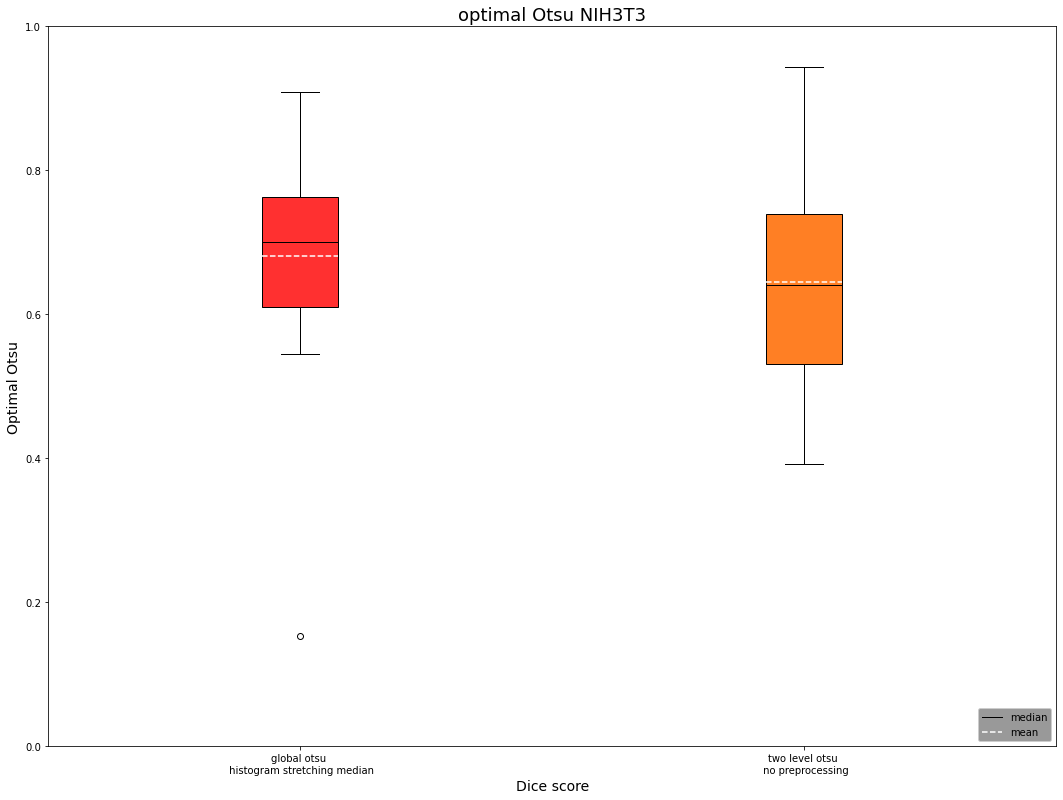

In [16]:
    ### test
    
    
    
    aa = [0.9080295797878731, 0.9080746699707551, 0.8240269286695534, 0.7523092096313426, 0.7667266042242559, 0.7210834846002242, 0.6796112266384551, 0.7467162829788587, 0.1537407710034592, 0.61035447425189, 0.6454520836896415, 0.676574551172507, 0.5441254230662401, 0.5872934791498239, 0.6104348417019902, 0.6002316933870171, 0.737465149556319, 0.7870066342425532]
    ba = [0.9417263695042412, 0.9439370328532631, 0.5938264317277092, 0.758336987687637, 0.7993590316749856, 0.7272126154647645, 0.6814227277548294, 0.7181630754976537, 0.39260486580391374, 0.6171748562804691, 0.6454109779570866, 0.41456195234474275, 0.49592209998602965, 0.5905319096281916, 0.5107143326635717, 0.6345225131588169, 0.7434112841158013, 0.40626796678720645]
 
    data = [aa, ba]
    fig_1 = plt.figure(figsize = (14 , 10))
    ax = fig_1.add_axes([0 , 0 , 1 , 1])
    ax.set_xticklabels(['global otsu \n histogram stretching median' , 'two level otsu \n no preprocessing', 'two level otsu clip', ' local adaptive thresholding counts', 'local adaptive thresholding average' ])
    ax.set_ylim([0, 1])

    plt.title('optimal Otsu NIH3T3', size = 18)
    plt.ylabel('Optimal Otsu' , size = 14)
    plt.xlabel('Dice score' , size = 14)


    bp = ax.boxplot(data, patch_artist = True , showmeans = True , meanline = True , meanprops = dict(color = "white" , linewidth = 1.5))
    colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF']
   
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color = 'black' , linewidth = 1)
    
    print(bp["means"][0])
    plt.legend([bp["medians"][0], bp["means"][0]] , ["median", 'mean'], loc = 'lower right' , facecolor = 'gray')
